# Spatio-temporal analysis

In [ ]:
import datetime

import pylandstats as pls

We are often interested in the analysis of the temporal evolution of the configuration and composition of a particular landscape. To that end, we will use the three extracts of [Veveyse district](https://en.wikipedia.org/wiki/Veveyse_District) from the [Swiss Land Statistics (SLS) datasets from the Swiss Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/services/geostat/swiss-federal-statistics-geodata/land-use-cover-suitability/swiss-land-use-statistics.html) for the years 1992, 2004 and 2012.

We first need to run the cell below so that the land use/land cover (LULC) data is downloaded and preprocessed (see [A03-swisslandstats-preprocessing.ipynb](https://github.com/martibosch/pylandstats-notebooks/blob/master/notebooks/A03-swisslandstats-preprocessing.ipynb) for more details).

In [ ]:
!snakemake -c1 -d .. -s ../Snakefile lulc_tifs

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).
Complete log: .snakemake/log/2024-05-01T091156.545577.snakemake.log


We can now use the class `SpatioTemporalAnalysis`, which we can instantiate with a temporally-ordered sequence of landscape snapshots.

In [ ]:
URBAN_CLASS_VAL = 1
input_filepaths = [
    "../data/processed/veveyse-AS97R_4.tif",
    "../data/processed/veveyse-AS09R_4.tif",
    "../data/processed/veveyse-AS18_4.tif",
]
years = ["1992", "2004", "2012"]

sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=years)
class_metrics_df = sta.compute_class_metrics_df()

[########################################] | 100% Completed | 1.15 ss


## Spatio-temporal data frames

By now, `SpatioTemporalAnalysis` only supports class and landscape-level metrics, which can be computed by means of its methods `compute_class_metrics_df` and `compute_landscape_metrics_df` respectively. For instance, a data frame of the class-level metrics can be obtained as follows:

In [ ]:
class_metrics_df = sta.compute_class_metrics_df()
class_metrics_df.head()

[########################################] | 100% Completed | 634.85 ms


total_area  proportion_of_landscape  number_of_patches  \
class_val dates                                                           
1         1992        794.0                 5.910817                309   
          2004        906.0                 6.744584                304   
          2012       1041.0                 7.749572                287   
2         1992       7805.0                58.103179                 54   
          2004       7692.0                57.261967                 54   

                 patch_density  largest_patch_index  total_edge  edge_density  \
class_val dates                                                                 
1         1992        2.300305             0.602993    227800.0     16.958237   
          2004        2.263083             0.699769    242000.0     18.015335   
          2012        2.136529             1.421872    256600.0     19.102211   
2         1992        0.401995            46.460210    661200.0     49.222065   
          2004        0.401995            45.723219    671500.0     49.988833   

                 total_core_area  core_area_proportion_of_landscape  \
class_val dates                                                       
1         1992              28.0                           0.208442   
          2004              50.0                           0.372218   
          2012              90.0                           0.669992   
2         1992            3403.0                          25.333135   
          2004            3246.0                          24.164371   

                 number_of_disjunct_core_areas  ...  \
class_val dates                                 ...   
1         1992                              10  ...   
          2004                              12  ...   
          2012                              20  ...   
2         1992                             149  ...   
          2004                             149  ...   

                 euclidean_nearest_neighbor_md  euclidean_nearest_neighbor_ra  \
class_val dates                                                                 
1         1992                      223.606798                     940.175425   
          2004                      223.606798                    1100.000000   
          2012                      223.606798                    1100.000000   
2         1992                      200.000000                     561.577311   
          2004                      200.000000                     624.621125   

                 euclidean_nearest_neighbor_sd  euclidean_nearest_neighbor_cv  \
class_val dates                                                                 
1         1992                      156.817097                      52.299458   
          2004                      162.962720                      54.136494   
          2012                      168.551251                      54.504167   
2         1992                       84.639515                      36.316396   
          2004                       90.750558                      38.990867   

                 disjunct_core_area_mn  disjunct_core_area_am  \
class_val dates                                                 
1         1992                2.800000               8.000000   
          2004                4.166667              10.720000   
          2012                4.500000              20.400000   
2         1992               22.838926             612.067881   
          2004               21.785235             567.346888   

                 disjunct_core_area_md  disjunct_core_area_ra  \
class_val dates                                                 
1         1992                     1.0                   13.0   
          2004                     1.5                   16.0   
          2012                     1.0                   31.0   
2         1992                     2.0                 1287.0   
          2004                     3.0                 12

Again, we can use the operations of any pandas data frame. For instance, we can get all the metrics for the *urban* class (`class_val` of 1) in 1992:

In [ ]:
class_metrics_df.loc[(1, "1992")]

total_area                 794.000000
proportion_of_landscape      5.910817
number_of_patches          309.000000
patch_density                2.300305
largest_patch_index          0.602993
                              ...    
disjunct_core_area_am        8.000000
disjunct_core_area_md        1.000000
disjunct_core_area_ra       13.000000
disjunct_core_area_sd        3.815757
disjunct_core_area_cv      136.277029
Name: (1, 1992), Length: 66, dtype: float64

Similarly, the data frame of landscape metrics can be obtained as follows:

In [ ]:
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 430.75 ms


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992,13433.0,687,5.114271,46.460210,730800.0,54.403335,5205.0,252,17.870690,3670.101913,...,223.606798,3124.154028,219.194252,71.079359,20.654762,419.752069,3.0,1287.0,96.064524,465.096253
2004,13433.0,689,5.129160,45.723219,739700.0,55.065883,5098.0,253,18.062500,3574.739894,...,223.606798,3124.154028,227.583997,73.502661,20.150198,390.293870,3.0,1281.0,91.490043,454.040427
2012,13433.0,665,4.950495,44.807563,749500.0,55.795429,5017.0,267,18.273707,3461.884836,...,223.606798,3124.154028,225.342246,72.916524,18.790262,297.768958,3.0,1012.0,76.948844,409.514476


### Customizing your spatio-temporal analysis

As within the `Landscape` analysis, we can also choose to compute a subset of metrics by passing them to the `metrics` keyword argument of the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, as in:

In [ ]:
metrics = ["proportion_of_landscape", "edge_density", "fractal_dimension_am"]
sta.compute_class_metrics_df(metrics=metrics)

[########################################] | 100% Completed | 100.93 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2012                  7.749572     19.102211              1.113777
2         1992                 58.103179     49.222065              1.285986
          2004                 57.261967     49.988833              1.287143
          2012                 56.271868     50.599270              1.287897
3         1992                 33.715477     38.338420              1.235716
          2004                 33.894141     38.286310              1.233035
          2012                 33.946252     38.167200              1.232546
4         1992                  2.270528      4.287948              1.069879
          2004                  2.099308      3.841286              1.069110
          2012                  2.032308      3.722177              1.073387

At the class-level, we can choose to compute the metrics only for a subset of classes through the `classes` argument. We can simoultaneously choose a subset of metrics as well as a subset of classes by specifying both the `metrics` and `classes` arguments. For instance, we can choose to only compute the above metrics and only for the *urban* class (value of 1):

In [ ]:
sta.compute_class_metrics_df(metrics=metrics, classes=[URBAN_CLASS_VAL])

[########################################] | 100% Completed | 101.18 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  5.910817     16.958237              1.083145
          2004                  6.744584     18.015335              1.089937
          2012                  7.749572     19.102211              1.113777

In both the `compute_class_metrics_df` and `compute_landscape_metrics_df` methods, we can also customize how some metrics are computed through the `metrics_kwargs` argument:

In [ ]:
metrics_kwargs = {
    "proportion_of_landscape": {"percent": False},
    "edge_density": {"count_boundary": True},
}
sta.compute_class_metrics_df(
    metrics=metrics, classes=[URBAN_CLASS_VAL], metrics_kwargs=metrics_kwargs
)

[########################################] | 100% Completed | 102.10 ms


proportion_of_landscape  edge_density  fractal_dimension_am
class_val dates                                                             
1         1992                  0.059108     17.151790              1.083145
          2004                  0.067446     18.223777              1.089937
          2012                  0.077496     19.325542              1.113777

On the other hand, the `dates` keyword argument might also be provided as string or `datetime` objects, e.g.:

In [ ]:
dates = [datetime.date(int(year), 1, 1) for year in years]
sta = pls.SpatioTemporalAnalysis(input_filepaths, dates=dates)
sta.compute_landscape_metrics_df()

[########################################] | 100% Completed | 2.19 ss


,total_area,number_of_patches,patch_density,largest_patch_index,total_edge,edge_density,total_core_area,number_of_disjunct_core_areas,landscape_shape_index,effective_mesh_size,...,euclidean_nearest_neighbor_md,euclidean_nearest_neighbor_ra,euclidean_nearest_neighbor_sd,euclidean_nearest_neighbor_cv,disjunct_core_area_mn,disjunct_core_area_am,disjunct_core_area_md,disjunct_core_area_ra,disjunct_core_area_sd,disjunct_core_area_cv
dates,,,,,,,,,,,,,,,,,,,,,
1992-01-01,13433.0,687,5.114271,46.460210,730800.0,54.403335,5205.0,252,17.870690,3670.101913,...,223.606798,3124.154028,219.194252,71.079359,20.654762,419.752069,3.0,1287.0,96.064524,465.096253
2004-01-01,13433.0,689,5.129160,45.723219,739700.0,55.065883,5098.0,253,18.062500,3574.739894,...,223.606798,3124.154028,227.583997,73.502661,20.150198,390.293870,3.0,1281.0,91.490043,454.040427
2012-01-01,13433.0,665,4.950495,44.807563,749500.0,55.795429,5017.0,267,18.273707,3461.884836,...,223.606798,3124.154028,225.342246,72.916524,18.790262,297.768958,3.0,1012.0,76.948844,409.514476


## Plots

One of the most important features of `SpatioTemporalAnalysis` is to plot the evolution of the metrics. We can plot the proportion o landscape occupied by the *urban* class (`class_val` of 1) as in:

[########################################] | 100% Completed | 102.02 ms


<Axes: ylabel='PLAND'>

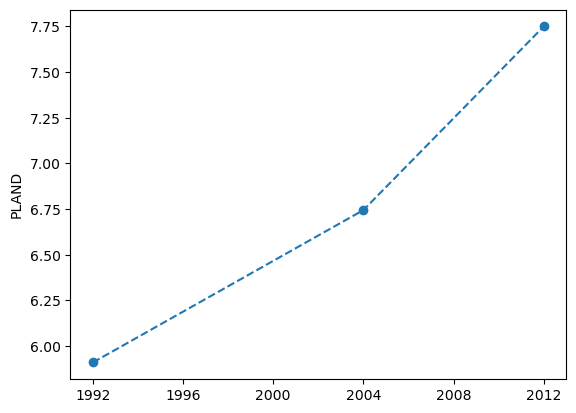

In [ ]:
sta.plot_metric("proportion_of_landscape", class_val=URBAN_CLASS_VAL)

If we want to plot the evolution of a metric at the landscape level, we can do so by using the same `plot_metric` method, but without setting the `class_val` argument. Note however that we cannot compute the `proportion_of_landscape` at the landscape level (we could but it makes no sense, the landscape always occupies 100% of the landscape). Similarly, some metrics such as `shannon_diversity_index` cannot be computed at the class level but only at the landscape level. See the documentation of each metric for more details.

Let's then plot the area-weighted fractal dimension, that is `fractal_dimension_am`, at both the class and landscape level:

[########################################] | 100% Completed | 102.38 ms
[########################################] | 100% Completed | 102.12 ms


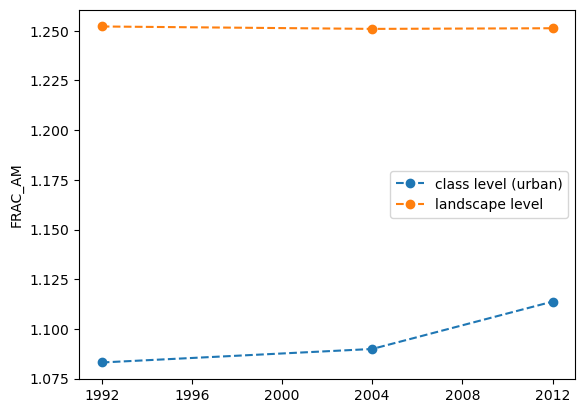

In [ ]:
ax = sta.plot_metric(
    "fractal_dimension_am",
    class_val=URBAN_CLASS_VAL,
    plot_kwargs={"label": "class level (urban)"},
)
_ = sta.plot_metric(
    "fractal_dimension_am", ax=ax, plot_kwargs={"label": "landscape level"}
)
ax.legend()

Note that we can pass keyword arguments to matplotlib's `plot` method through the `plt_kws` argument of `plot_metric`. See the documentation of  [SpatioTemporalAnalysis.plot_metric](https://pylandstats.readthedocs.io/en/latest/spatiotemporal.html#pylandstats.SpatioTemporalAnalysis.plot_metric) for more details.

## See also

* [SpatioTemporalZonalAnalysis](https://github.com/martibosch/pylandstats-notebooks/blob/main/notebooks/04-spatiotemporal-zonal-analysis.ipynb)